In [1]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
from scipy import stats
%matplotlib inline

In [2]:
def med_med (true,fitted):
    temp = fitted - true
    return (np.median(np.abs(temp-np.median(temp))))

def med_med_weight (true,fitted,weight):
    temp = fitted - true
    #w = weight/np.median(weight)
    w = weight #/np.sum(weight)
    return (np.median(w*np.abs(temp-np.median(temp))))/np.median(weight)

def rms (true,fitted):
    temp = fitted - true
    return np.sqrt((np.sum(temp**2))/len(temp))
    
def rms_w (true,fitted,w):
    temp = fitted - true
    w = w/np.mean(w)
    #w = w/np.sum(w)
    return np.sqrt((np.sum(w*(temp**2)))/len(temp))

start = time.time()

home = os.path.expanduser("~")

direc = os.listdir(".")

In [3]:
name = 'alllc_full_info_w_smoothing.CSV'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
df = pd.read_csv(tempdata)

df['u0_true'] = np.abs(df['u0_true'])
df['u0_fitted'] = np.abs(df['u0_fitted'])

In [4]:
red_chi_2_1 = np.abs(2*df['chi_2_1'])
red_chi_2_2 = np.abs(2*df['chi_2_2'])

In [5]:
name = 'double-peaked.csv'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata2 = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
dd = pd.read_csv(tempdata2)

In [6]:
df_new_test = df
df = df.reset_index()
for i in range(len(df)):
    if df['name'][i] in np.asarray(dd['name']):
        print i
        df = df.drop([i], axis=0)
print 'done'

50
61
78
87
127
129
154
161
162
166
179
208
213
218
272
284
286
293
324
360
369
429
432
464
495
500
558
560
561
563
597
605
623
651
662
667
670
677
683
694
704
706
768
769
774
820
840
889
1042
1067
1081
1149
1254
1312
1332
1339
1345
1353
1364
1395
1405
1436
1451
1468
1483
1606
1608
1644
1682
1699
1729
1761
1772
1776
1780
1840
1887
1890
1955
1988
2071
2077
2079
2096
2108
2111
2137
2139
2148
2160
2176
2187
2205
2277
2306
2312
2336
2386
2396
2405
2420
2425
2428
2439
2475
2524
2531
2560
2585
2608
2718
2725
2737
2738
2755
2811
2854
2901
2904
2910
2938
2941
2972
2989
3021
3061
3072
3077
3078
3081
3096
3102
3131
3136
3164
3199
3228
3240
3290
3309
3321
3345
3408
3479
3485
3524
3616
3624
3626
3628
3642
3645
3667
3675
3677
3700
3716
3758
3814
3820
3831
3836
3883
3912
3935
3946
3947
3948
3950
3953
3982
3984
3987
4027
4066
4091
4097
4099
4109
4112
4115
4120
4121
4137
4142
4149
4157
4171
4198
4225
4226
4233
4243
4245
4248
4249
4267
4268
4272
4298
4353
4368
4371
4391
4399
4402
4409
4446
4450
4466
44

In [7]:
print len(df)
#df = df[ (df['chi_2_2']>-25000) & (df['s_fitted']<5) & ((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.1)]
#df = df[(np.abs(df['t0_fitted']-df['tp_fitted'])>1) & ((-2*df['chi_2_2']/41039)>1.003) ]
df_org = df
df['q_fitted_log'][df['q_fitted_log']>0] = np.log10( 1/df['q_fitted'][df['q_fitted_log']>0] )
df['q_fitted'][df['q_fitted_log']>0] = ( 1/df['q_fitted'][df['q_fitted_log']>0] )

df = df[((red_chi_2_1-red_chi_2_2)>40)]
print (len(df))


12314
9309


/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [8]:
#df = df[np.abs(df['u0_fitted'])>0.045] #02/20/2018
df = df[(df['s_fitted']>1.03)|(df['s_fitted']<0.97)] #03/25/2019

print(len(df))

7813


In [9]:
df = df[df['s_fitted']<5]
len(df)

7355

In [10]:
med_med (df['t0_true'],df['t0_fitted'])

0.023661668500039923

In [11]:
med_med (np.abs(df['tE_true']),np.abs(df['tE_fitted']))

0.37085018799000036

In [12]:
min(df['tE_fitted'])

-152.020009979

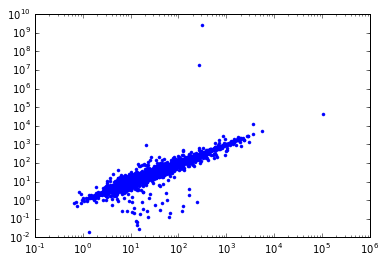

In [13]:
plt.plot(np.abs(df['tE_true']),np.abs(df['tE_fitted']),'b.')
plt.xscale('log')
plt.yscale('log')

In [29]:
med_med (np.abs(df['u0_true']),np.abs(df['u0_fitted']))

0.01072295384999998

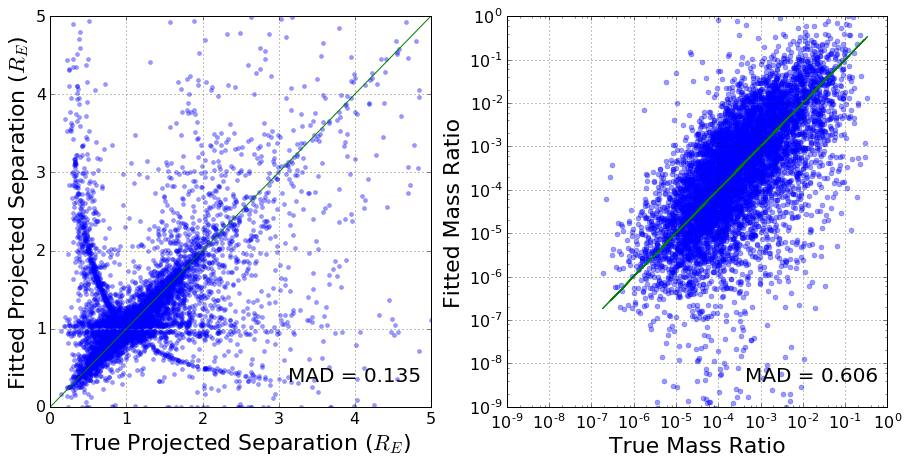

In [54]:
MAD_x = 0.8
MAD_y = 0.08
plt.close()

f, axarr = plt.subplots(1, 2)
#f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters for '+str(len(df))+' targets',size=20)

#axarr[0].set_title('Projected Separation' ,size=26)

axarr[0].plot (df['s_true'],df['s_fitted'],'b.',label='_nolegend_',markersize=8 , alpha = 0.4)
#axarr[0].plot (df['s_true'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['s_fitted'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',label='_nolegend_',markersize=8 , alpha = 0.4)

axarr[0].plot ((0,5),(0,5),'g-',label='_nolegend_')
axarr[0].set_xlim((0,5))
axarr[0].set_ylim((0,5))
axarr[0].tick_params(axis='x',labelsize=16)
axarr[0].tick_params(axis='y',labelsize=16)
#plt.legend()
plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df['s_true'],df['s_fitted']),3)), size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
axarr[0].set_xlabel('True Projected Separation ($R_E$)',size=22)
axarr[0].set_ylabel('Fitted Projected Separation ($R_E$)',size=22)
axarr[0].grid()


#axarr[1].set_title('Mass Ratio ',size=26)
axarr[1].loglog (df['q_true'],df['q_fitted'],'b.',markersize=10,label='_nolegend_',alpha=0.4)
#axarr[1].plot (df['q_true_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['q_fitted_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',markersize=10,label='_nolegend_',alpha=0.4)

axarr[1].loglog (df['q_true'],df['q_true'],'g-',label='_nolegend_')
axarr[1].set_xlim((10**-9,1))
axarr[1].set_ylim(( 10**-9,1))
plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df['q_true_log'],df['q_fitted_log']),3)), size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)

axarr[1].set_xlabel('True Mass Ratio',size=22)
axarr[1].set_ylabel('Fitted Mass Ratio',size=22)
axarr[1].tick_params(axis='x',labelsize=16)
axarr[1].tick_params(axis='y',labelsize=16)
#plt.legend()
axarr[1].grid()





f.set_size_inches(15.0,7)
f.savefig(home+'/Desktop/result_q_s.png')

In [10]:
df['tEp_true_2'] = df['tE_true']*np.sqrt(df['q_true'] + (df['rho']**2))
df['tEp_fitted_2'] = df['tEp_fitted']

In [11]:
# Absolute deviation from median for regin s_true>1 and s_fitted>1
x1 = np.abs((df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)]) - 
           np.median(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)]))

# Absolute deviation from median for regin s_true<1 and s_fitted>1
x2 = np.abs( (df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)]-1.0/df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)]) - 
            np.median (1.0/df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)]))

# Absolute deviation from median for regin s_true>1 and s_fitted<1
x3 = np.abs( (df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)]-1.0/df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)]) - 
            np.median (1.0/df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)]))

# Absolute deviation from median for regin s_true<1 and s_fitted<1
x4 = np.abs( (df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)]) - 
            np.median (df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)]-df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)]))

# Merging all above lists. a is absolute deviation from median for all targets with respect to their own distributions
frames1 = [x1,x4]
frames2 = [x2,x3]
frames3 = [x1,x2,x3,x4]
a_one_one = np.median(pd.concat(frames1))
a_curve = np.median(pd.concat(frames2))
a_total = np.median(pd.concat(frames3))

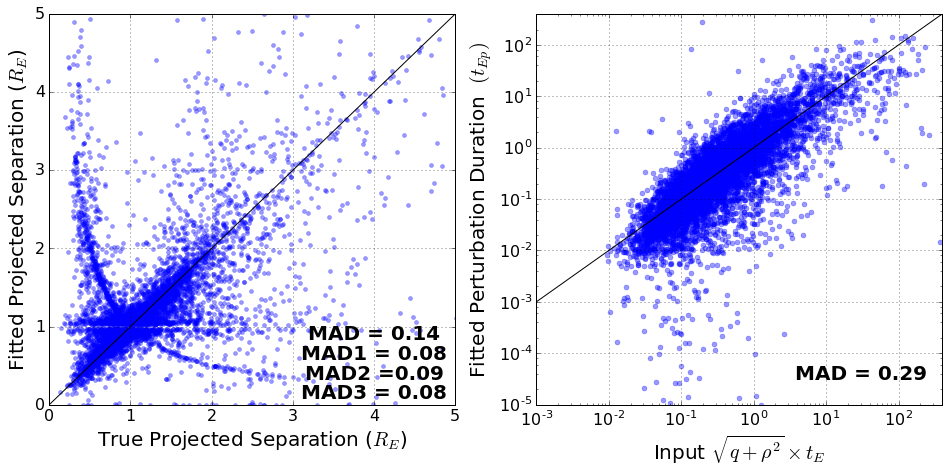

In [57]:
MAD_x = 0.8
MAD_y = 0.08
plt.close()

f, axarr = plt.subplots(1, 2)
#f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters for '+str(len(df))+' targets',size=20)

#axarr[0].set_title('Projected Separation' ,size=26)

axarr[0].plot (df['s_true'],df['s_fitted'],'b.',label='_nolegend_',markersize=8 , alpha = 0.4)
#axarr[0].plot (df['s_true'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['s_fitted'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',label='_nolegend_',markersize=8 , alpha = 0.4)
#
axarr[0].plot ((0,5),(0,5),'k-',label='_nolegend_')
axarr[0].set_xlim((0,5))
axarr[0].set_ylim((0,5))
axarr[0].tick_params(axis='x',labelsize=16)
axarr[0].tick_params(axis='y',labelsize=16)
#plt.legend()
plt.text(MAD_x, MAD_y+0.1, 'MAD = '+str(round(med_med(df['s_true'],df['s_fitted']),2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
plt.text(MAD_x, MAD_y+0.05, 'MAD1 = '+str(round(a_one_one,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
plt.text(MAD_x, MAD_y, 'MAD2 ='+str(round(a_curve,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
plt.text(MAD_x, MAD_y-0.05, 'MAD3 = '+str(round(a_total,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
axarr[0].set_xlabel('True Projected Separation ($R_E$)',size=20)
axarr[0].set_ylabel('Fitted Projected Separation ($R_E$)',size=20)
axarr[0].grid()


#axarr[1].set_title('Mass Ratio ',size=26)
axarr[1].loglog (df['tEp_true_2'],df['tEp_fitted'],'b.',markersize=10,label='_nolegend_',alpha=0.4)
axarr[1].loglog (df['tEp_true_2'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
                 df['tEp_fitted'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
                 'r.', markersize=10,label='_nolegend_',alpha=0.4)


#axarr[1].plot (df['q_true_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['q_fitted_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',markersize=10,label='_nolegend_',alpha=0.4)

axarr[1].loglog ((10**-3,400),( 10**-3,400),'k-',label='_nolegend_')
axarr[1].set_xlim((10**-3,400))
axarr[1].set_ylim(( 10**-5,400))
plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(np.log10(np.abs(df['tEp_true_2'])),np.log10(np.abs(df['tEp_fitted']))),2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)

axarr[1].set_xlabel( 'Input '+r'$\sqrt{q+{\rho}^2}\times t_E$',size=20)
axarr[1].set_ylabel('Fitted Perturbation Duration '+ r' $(t_{Ep})$',size=20)
axarr[1].tick_params(axis='x',labelsize=16)
axarr[1].tick_params(axis='y',labelsize=16)
#plt.legend()
axarr[1].grid()





f.set_size_inches(16,7)
f.savefig(home+'/Desktop/result_q_s_after_smoothing.png')

In [12]:
# Absolute deviation from median for regin s_true>1 and s_fitted>1
x1 = np.abs((np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)])-np.log10(df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)])) - 
           np.median(np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)])-np.log10(df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)])))

# Absolute deviation from median for regin s_true<1 and s_fitted>1
x2 = np.abs( (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)])-np.log10(1.0/df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)])-np.log10(1.0/df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)])))

# Absolute deviation from median for regin s_true>1 and s_fitted<1
x3 = np.abs( (np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)])-np.log10(1.0/df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)])-np.log10(1.0/df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)])))

# Absolute deviation from median for regin s_true<1 and s_fitted<1
x4 = np.abs( (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)])-np.log10(df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)])-np.log10(df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)])))

# Merging all above lists. a is absolute deviation from median for all targets with respect to their own distributions
frames1 = [x1,x4]
frames2 = [x2,x3]
frames3 = [x1,x2,x3,x4]

a_one_one = np.median(pd.concat(frames1))
a_curve = np.median(pd.concat(frames2))
a_total = np.median(pd.concat(frames3))

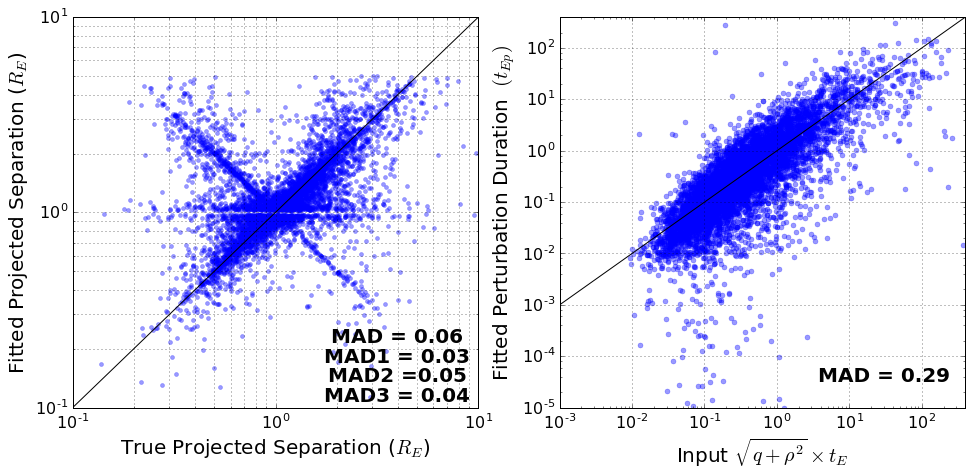

In [59]:
MAD_x = 0.8
MAD_y = 0.08
plt.close()

f, axarr = plt.subplots(1, 2)
#f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters for '+str(len(df))+' targets',size=20)

#axarr[0].set_title('Projected Separation' ,size=26)

axarr[0].loglog (df['s_true'],df['s_fitted'],'b.',label='_nolegend_',markersize=8 , alpha = 0.4)
#axarr[0].plot (df['s_true'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['s_fitted'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',label='_nolegend_',markersize=8 , alpha = 0.4)
#
axarr[0].loglog ((0.1,10),(0.1,10),'k-',label='_nolegend_')
axarr[0].set_xlim((0.1,10))
axarr[0].set_ylim((0.1,10))
axarr[0].tick_params(axis='x',labelsize=16)
axarr[0].tick_params(axis='y',labelsize=16)
#plt.legend()
plt.text(MAD_x, MAD_y+0.1, 'MAD = '+str(round(med_med(np.log10(np.abs(df['s_true'])),np.log10(np.abs(df['s_fitted']))),2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
plt.text(MAD_x, MAD_y+0.05, 'MAD1 = '+str(round(a_one_one,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
plt.text(MAD_x, MAD_y, 'MAD2 ='+str(round(a_curve,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
plt.text(MAD_x, MAD_y-0.05, 'MAD3 = '+str(round(a_total,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
axarr[0].set_xlabel('True Projected Separation ($R_E$)',size=20)
axarr[0].set_ylabel('Fitted Projected Separation ($R_E$)',size=20)
axarr[0].grid(b=True, which='minor')
axarr[0].grid(b=True, which='major')



#axarr[1].set_title('Mass Ratio ',size=26)
axarr[1].loglog (df['tEp_true_2'],df['tEp_fitted'],'b.',markersize=10,label='_nolegend_',alpha=0.4)
axarr[1].loglog (df['tEp_true_2'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
                 df['tEp_fitted'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
                 'r.', markersize=10,label='_nolegend_',alpha=0.4)


#axarr[1].plot (df['q_true_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['q_fitted_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',markersize=10,label='_nolegend_',alpha=0.4)

axarr[1].loglog ((10**-3,400),( 10**-3,400),'k-',label='_nolegend_')
axarr[1].set_xlim((10**-3,400))
axarr[1].set_ylim(( 10**-5,400))
plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(np.log10(np.abs(df['tEp_true_2'])),np.log10(np.abs(df['tEp_fitted']))),2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)

axarr[1].set_xlabel( 'Input '+r'$\sqrt{q+{\rho}^2}\times t_E$',size=20)
axarr[1].set_ylabel('Fitted Perturbation Duration '+ r' $(t_{Ep})$',size=20)
axarr[1].tick_params(axis='x',labelsize=16)
axarr[1].tick_params(axis='y',labelsize=16)
#plt.legend()
axarr[1].grid()





f.set_size_inches(16,7)
f.savefig(home+'/Desktop/result_q_s_after_smoothing_log_S.png')

In [13]:
df['tE_ratio'] = np.abs(df['tEp_fitted']/df['tE_fitted'])**2

In [14]:
df['q_true_new'] = df['q_true'] + (df['rho']**2)

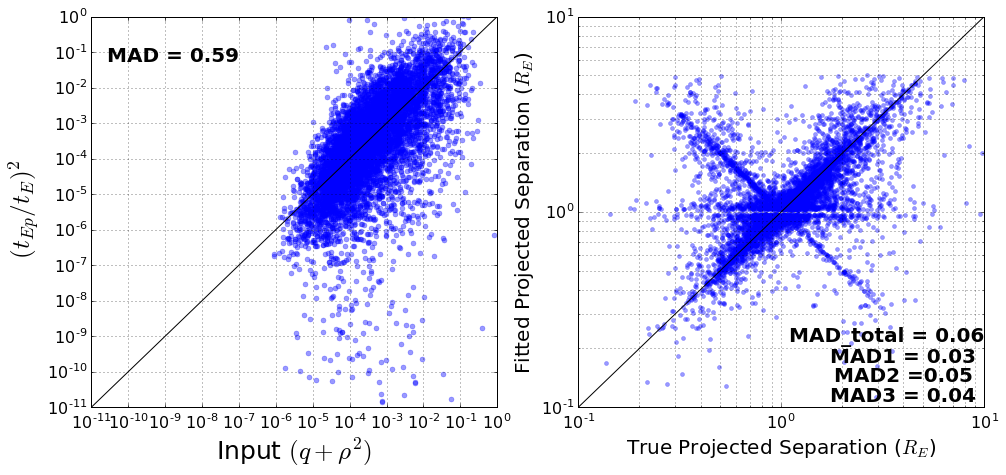

In [90]:
MAD_x = 0.8
MAD_y = 0.08
plt.close()

f, axarr = plt.subplots(1, 2)
#f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters for '+str(len(df))+' targets',size=20)


#axarr[0].set_title('Mass Ratio ',size=26)
axarr[0].loglog (df['q_true_new'],df['tE_ratio'],'b.',markersize=10,label='_nolegend_',alpha=0.4)
# axarr[0].loglog (df['tEp_true_2'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
#                  df['tEp_fitted'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
#                  'r.', markersize=10,label='_nolegend_',alpha=0.4)


#axarr[0].plot (df['q_true_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['q_fitted_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',markersize=10,label='_nolegend_',alpha=0.4)

axarr[0].loglog ((10**-11,1.0),( 10**-11,1.0),'k-',label='_nolegend_')
axarr[0].set_xlim((10**-11,1.0))
axarr[0].set_ylim(( 10**-11,1.0))
plt.text(0.2,0.9, 'MAD = '+str(round(med_med(np.log10(np.abs(df['q_true_new'])),np.log10(np.abs(df['tE_ratio']))),2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)

axarr[0].set_xlabel( 'Input '+r'$(q+{\rho}^2)$',size=25)
axarr[0].set_ylabel( r' ${(t_{Ep}/t_E)}^2$',size=25)
axarr[0].tick_params(axis='x',labelsize=16)
axarr[0].tick_params(axis='y',labelsize=16)
#plt.legend()
axarr[0].grid()



#axarr[1].set_title('Projected Separation' ,size=26)

axarr[1].loglog (df['s_true'],df['s_fitted'],'b.',label='_nolegend_',markersize=8 , alpha = 0.4)
#axarr[1].plot (df['s_true'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['s_fitted'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',label='_nolegend_',markersize=8 , alpha = 0.4)
#
axarr[1].loglog ((0.1,10),(0.1,10),'k-',label='_nolegend_')
axarr[1].set_xlim((0.1,10))
axarr[1].set_ylim((0.1,10))
axarr[1].tick_params(axis='x',labelsize=16)
axarr[1].tick_params(axis='y',labelsize=16)
#plt.legend()
plt.text(MAD_x-0.04, MAD_y+0.1, 'MAD_total = '+str(round(med_med(np.log10(np.abs(df['s_true'])),np.log10(np.abs(df['s_fitted']))),2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)
plt.text(MAD_x, MAD_y+0.05, 'MAD1 = '+str(round(a_one_one,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)
plt.text(MAD_x, MAD_y, 'MAD2 ='+str(round(a_curve,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)
plt.text(MAD_x, MAD_y-0.05, 'MAD3 = '+str(round(a_total,2)),fontweight='bold', size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)
axarr[1].set_xlabel('True Projected Separation ($R_E$)',size=20)
axarr[1].set_ylabel('Fitted Projected Separation ($R_E$)',size=20)
axarr[1].grid(b=True, which='minor')
axarr[1].grid(b=True, which='major')









f.set_size_inches(16,7)
f.savefig(home+'/Desktop/result_q_s_after_smoothing_log_S_tep_te_ratio.png')

In [15]:
bin_means, bin_edges, binnumber = stats.binned_statistic(df['q_true_new'],
                 df['tE_ratio'], statistic='median', bins=np.logspace(-6,-1,10))

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


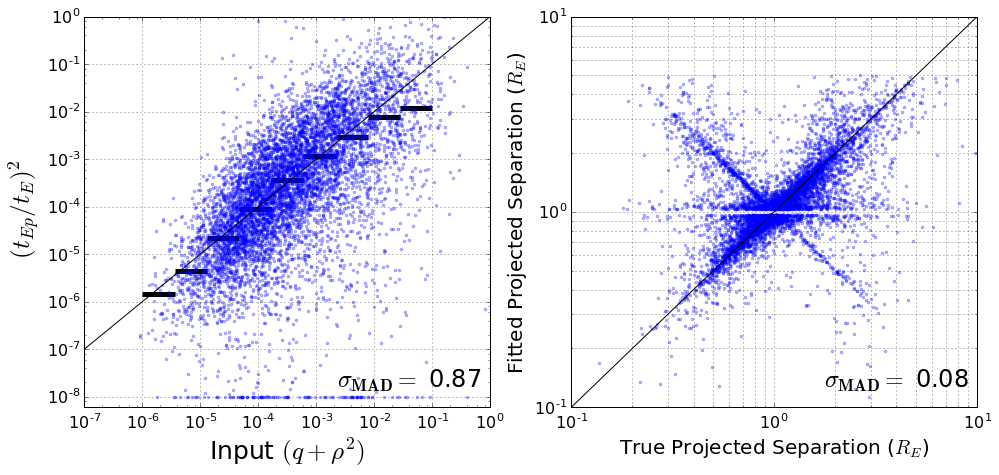

In [16]:
MAD_x = 0.8
MAD_y = 0.08
plt.close()

tE_ratio = df['tE_ratio']
tE_ratio[tE_ratio<1e-8] = 1e-8

f, axarr = plt.subplots(1, 2)
#f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters for '+str(len(df))+' targets',size=20)


#axarr[0].set_title('Mass Ratio ',size=26)
axarr[0].loglog (df['q_true_new'],tE_ratio,'b.',markersize=6
                 ,label='_nolegend_',alpha=0.3)
# axarr[0].loglog (df['tEp_true_2'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
#                  df['tEp_fitted'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
#                  'r.', markersize=10,label='_nolegend_',alpha=0.4)


#axarr[0].plot (df['q_true_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['q_fitted_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',markersize=10,label='_nolegend_',alpha=0.4)

axarr[0].loglog ((10**-11,1.0),( 10**-11,1.0),'k-',label='_nolegend_')


axarr[0].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5)
           #label='binned statistic of data')

axarr[0].set_xlim((10**-7,1.0))
axarr[0].set_ylim(( 6e-9,1.0))
plt.text(MAD_x, MAD_y-0.01, r'${\bf {\sigma}_{MAD} =}$ '+str(round(1.48*med_med(np.log10(np.abs(df['q_true_new'])),np.log10(np.abs(df['tE_ratio']))),2)), size = 24
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)

axarr[0].set_xlabel( 'Input '+r'$(q+{\rho}^2)$',size=25)
axarr[0].set_ylabel( r' ${(t_{Ep}/t_E)}^2$',size=25)
# axarr[0].set_xlabel( 'True Mass Ratio',size=25)
# axarr[0].set_ylabel( 'Fitted Mass Ratio',size=25)
axarr[0].tick_params(axis='x',labelsize=16)
axarr[0].tick_params(axis='y',labelsize=16)
#plt.legend()
axarr[0].grid()



#axarr[1].set_title('Projected Separation' ,size=26)

axarr[1].loglog (df['s_true'],df['s_fitted'],'b.',label='_nolegend_',markersize=6 , alpha = 0.3)
#axarr[1].plot (df['s_true'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['s_fitted'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',label='_nolegend_',markersize=8 , alpha = 0.4)
#
axarr[1].loglog ((0.1,10),(0.1,10),'k-',label='_nolegend_')
axarr[1].set_xlim((0.1,10))
axarr[1].set_ylim((0.1,10))
axarr[1].tick_params(axis='x',labelsize=16)
axarr[1].tick_params(axis='y',labelsize=16)
#plt.legend()
plt.text(MAD_x, MAD_y-0.01, r'${\bf {\sigma}_{MAD} =}$ '+str(round(1.48* med_med(np.log10(np.abs(df['s_true'])),np.log10(np.abs(df['s_fitted']))),2)), size = 24
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)
# plt.text(MAD_x, MAD_y+0.05, 'MAD1 = '+str(round(a_one_one,2)),fontweight='bold', size = 20
#         ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)
# plt.text(MAD_x, MAD_y, 'MAD2 ='+str(round(a_curve,2)),fontweight='bold', size = 20
#         ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)
# plt.text(MAD_x, MAD_y-0.05, 'MAD3 = '+str(round(a_total,2)),fontweight='bold', size = 20
#         ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)
axarr[1].set_xlabel('True Projected Separation ($R_E$)',size=20)
axarr[1].set_ylabel('Fitted Projected Separation ($R_E$)',size=20)
axarr[1].grid(b=True, which='minor')
axarr[1].grid(b=True, which='major')









f.set_size_inches(16,7)
f.savefig(home+'/Desktop/result_q_s_after_smoothing_log_S_tep_te_ratio.png')

In [30]:
med_med(df['s_true'],df['s_fitted'])*100

13.603597537500011

In [13]:
med_med(df['q_true'],df['q_fitted'])*100

0.034682540279746

# Measuring weighted statistics

In [13]:
G = 6.67e-11
m_sun = 1.989e30
kpc = 3.086e19
c = 2.99e8
const = 4*(G*m_sun)/(kpc*(c**2))
d_rel = (df['D_l']*df['D_s'])/(df['D_s']-df['D_l'])
df['theta_E'] = np.sqrt(df['m_l']*const / d_rel)

In [14]:
df['mu_l'] = np.sqrt((df['mu_l_b']**2)+(df['mu_l_l']**2))
df['mu_s'] = np.sqrt((df['mu_s_b']**2)+(df['mu_s_l']**2))

In [15]:
df['mu_rel'] =  df['mu_s']- df['mu_l']

In [16]:
#df['weight'] = df['mu_rel']*df['theta_E']

In [17]:
df['weight'] = np.sqrt((df['mu_s_b']-df['mu_l_b'])**2 + (df['mu_s_l']-df['mu_l_l'])**2)*df['theta_E']

In [18]:
max(df['weight']/np.median(df['weight']))

3.5666904517853717

In [19]:
med_med(df['s_true'],df['s_fitted'])

0.13509452051650006

In [20]:
med_med(np.log10(np.abs(df['tEp_true_2'])),np.log10(np.abs(df['tEp_fitted'])))

0.2938480826649262

In [21]:
med_med((np.abs(df['tEp_true_2'])),(np.abs(df['tEp_fitted'])))

0.1801799917377876

In [22]:
med_med_weight((np.abs(df['tEp_true_2'])),(np.abs(df['tEp_fitted'])), df['weight'])

0.18096696316224314

In [23]:
med_med_weight(np.log10(np.abs(df['tEp_true_2'])),np.log10(np.abs(df['tEp_fitted'])),df['weight'])

0.29594447329416135

In [24]:
med_med_weight(df['s_true'],df['s_fitted'],df['weight'])

0.13607173620313548

In [226]:
rms(df['s_true'],df['s_fitted'])

0.9786235514613973

In [224]:
rms(np.log10(np.abs(df['tEp_true_2'])),np.log10(np.abs(df['tEp_fitted'])))

0.6380618000430526

In [242]:
rms_w(np.log10(np.abs(df['tEp_true_2'])),np.log10(np.abs(df['tEp_fitted'])),df['weight'])

0.6381409534451664

In [243]:
rms_w(df['s_true'],df['s_fitted'],df['weight'])

0.9105221757779366

In [3]:
import numpy as np
box = np.ones(19)/19

In [6]:
(box)

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158])

In [31]:
len(df)

7108

In [34]:
med_med(df['s_true'][df['q_true']>1e-3],df['s_fitted'][df['q_true']>1e-3])

0.35768428350899995

In [40]:
med_med(df['s_true_log'][df['q_true']>1e-3],df['s_fitted_log'][df['q_true']>1e-3])

0.1490574326381

In [41]:
med_med(df['s_true_log'][df['q_true']<1e-5],df['s_fitted_log'][df['q_true']<1e-5])

0.006508743606600011

In [35]:
med_med(df['q_true_log'][(df['s_true']>1.1) | (df['s_true']<0.9)],df['q_fitted_log'][(df['s_true']>1.1) | (df['s_true']<0.9)])

0.5866058043300002

In [51]:
med_med((np.abs(df['tEp_true_2'])),
        (np.abs(df['tEp_fitted'])))

0.19256032387478814

In [18]:
med_med((np.abs(df['tEp_true_2'][(df['s_true']>1.1) | (df['s_true']<0.9)])),
        (np.abs(df['tEp_fitted'][(df['s_true']>1.1) | (df['s_true']<0.9)])))

0.2102628456671169

In [19]:
med_med(np.log10(np.abs(df['tEp_true_2'][(df['s_true']>1.1) | (df['s_true']<0.9)])),
        np.log10(np.abs(df['tEp_fitted'][(df['s_true']>1.1) | (df['s_true']<0.9)])))

0.2903275313063047

In [90]:
med_med(((df['tEp_true_2'][(df['s_true']<1.1) & (df['s_true']>0.9)])),
        ((df['tEp_fitted'][(df['s_true']<1.1) & (df['s_true']>0.9)])))

0.10006940354265147

In [142]:
df_org[['name','u0_true']][(df_org['t0_true']<310.3) & (df_org['t0_true']>310.0)]

,name,u0_true
2812,cassan_26_76_3186.det.lc.gz,0.357222
6442,cassan_32_136_3046.det.lc.gz,0.321071


In [135]:
round(df_org['u0_true'],2)

TypeError: cannot convert the series to <type 'float'>